## AutoEncode 노이즈 제거
---
- 데이터에 노이즈 제거 활용
- 데이터에서 주요 특징만 추출 압축하기 때문에 노이즈는 주요 특징에서 제거
- 압축된 주요 특징으로 데이터 복원 => 노이즈 제거

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import set_random_seed, plot_model

In [2]:
(x_train, y_train), (x_test, y_test)=load_data()
print(f'x_train.shape : {x_train.shape}, x_test.shape: {x_test.shape}')
print(f'y_train.shape : {y_test.shape}, y_test.shape: {x_test.shape}')

x_train.shape : (60000, 28, 28), x_test.shape: (10000, 28, 28)
y_train.shape : (10000,), y_test.shape: (10000, 28, 28)


In [3]:
x_train=x_train.reshape(-1, 28*28)/255.0
x_test=x_test.reshape(-1, 28*28)/255.0

In [4]:
# 데이터셋에 노이즈 추가
# np.random.normal(평균loc=0.0, 표준편차scale=1.0, 출력size=None)
x_train_noised = x_train + np.random.normal(0, 0.5, size=x_train.shape)
x_test_noised = x_test + np.random.normal(0, 0.5, size=x_test.shape)

# 픽셀범위 0.0~1.0 벗어나는 픽셀값 조정 np.clip(array, min, max)
x_train_noised = np.clip(x_train_noised, a_min=0, a_max=1)
x_test_noised = np.clip(x_test_noised, a_min=0, a_max=1)

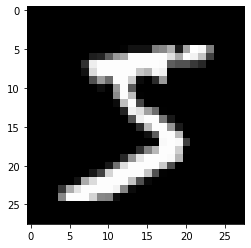

In [5]:
plt.imshow(x_train[0].reshape(28,28), cmap='gray')
plt.show()

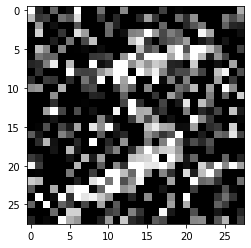

In [6]:
plt.imshow(x_train_noised[0].reshape(28,28), cmap='gray')
plt.show()